In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#이상치 탐지 방법
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# 이상치 탐지방법
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# 데이터 생성
data = np.random.randn(100) * 20 + 50
data = np.append(data, [150, -50, 200])  # <- 명확한 이상치 추가

# 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['Data'])

# `IQR` 이상치 탐지

In [7]:
# Q1, Q3 계산
Q1 = df['Data'].quantile(0.25)
Q3 = df['Data'].quantile(0.75)

# IOR 계산
IQR = Q3- Q1

# 이상치의 경계 계산
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# 이상치를 식별
outliers = df[(df['Data'] < lower_bound) | (df['Data']> upper_bound)]

outliers

,Data
99,-7.636548
100,150.000000
101,-50.000000
102,200.000000


In [8]:
print(Q1, Q3, IQR,lower_bound,upper_bound, outliers)

35.8586906256384 62.678670098304565 26.819979472666162 -4.371278583360841 102.90863930730382            Data
99    -7.636548
100  150.000000
101  -50.000000
102  200.000000


# `IsolationForest` 이상치 탐지

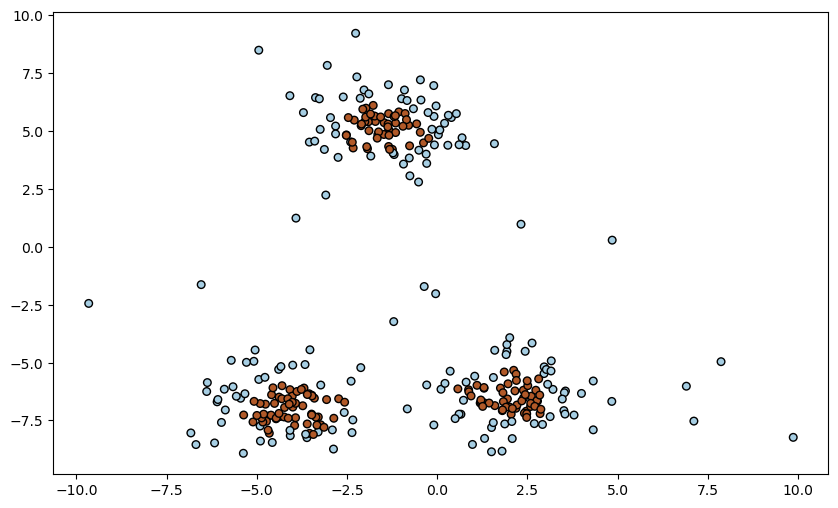

In [9]:
# 중심점 3개인 데이터 생성 
data, _ = make_blobs(n_samples = 300, centers=3, random_state=111)

#이상치 추가
outliers = np.random.uniform(low=-10, high=10, size=(20,2))

# 위 원본데이터 이상치데이터 합치기

data = np.vstack([data, outliers])

# Isolation Forest로 모델 생성 및 학습
model = IsolationForest(n_estimators = 100,contamination=0.5, random_state=111)
# comtamination 
# 이상치가 차지하는 비율을 나타내는 것 0과 1사이의 실수로 표현, 기본은 'auto' -> 데이터셋에따라 알아서 이상치를 탐지한다.
# 값이 높아질수록 더 많은 데이터셋이 이상치로 간주하게 된다.  False Positive 증가하는 경우 
# 값이 낮은 경우는 이상치 판단되는 데이터셋 포인트 수가 줄어든다. False Negative 증가하는 경우 

#모델이 직접 예측
predictions = model.fit_predict(data)

#데이터 시각화 진행
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], c =predictions, cmap='Paired', marker='o', s=30, edgecolor='k')

In [10]:
print(predictions)

[ 1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1
 -1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1
 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1
 -1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1
 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1 -1  1  1 -1
  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1  1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [11]:
model

IsolationForest(contamination=0.5, random_state=111)

# 시계열 데이터 `롤링함수`를 통해 간단히 이상치 탐지

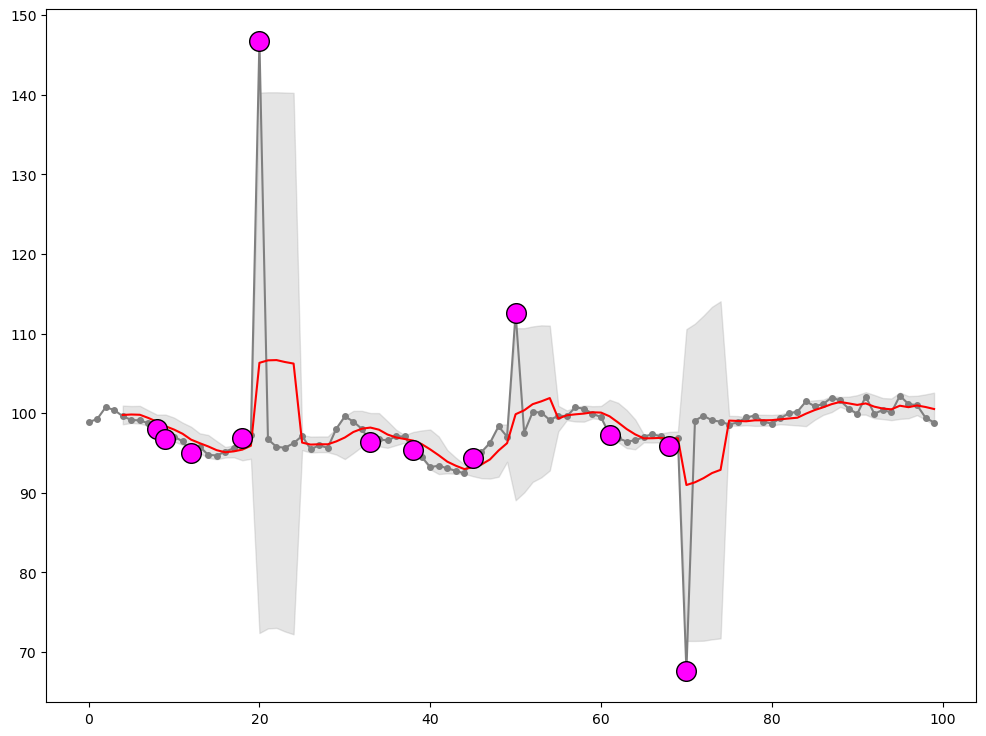

In [12]:
# 데이터 생성
np.random.seed(111)
data= np.random.randn(100).cumsum() + 100

# 이상치 추가하기 
data[20] +=50
data[70] -=30
data[50] +=15 

# 이동평균 표준편차 계산으로 이상치 탐지
window_size = 5
moving_average = pd.Series(data).rolling(window = window_size).mean()
moving_std = pd.Series(data).rolling(window = window_size).std()

# 이상치 탐지 기준 설정 (평균 +- 1.5 *표준편차)
upper_bound = moving_average + 1.5 * moving_std
lower_bound = moving_average - 1.5 * moving_std

# 데이터프레임 생성해서 확인하기 
df = pd.DataFrame({'Data':data, 'Moving Average':moving_average, 'upper_bound':upper_bound,'lower_bound':lower_bound})

# 이상치 탐지 
outliers =df[(df['Data'] > df['upper_bound'])| (df['Data'] < df['lower_bound'])]

# 시각화로 확인 
plt.figure(figsize=(12,9))
plt.plot(df['Data'], label='Data', color='gray', marker='o', markersize=4, linestyle='-')
plt.plot(df['Moving Average'], color='red',label='Moving average')
plt.fill_between(df.index, df['upper_bound'], df['lower_bound'], color='gray', alpha=0.2, label='Confidence Interval')
plt.scatter(outliers.index, outliers['Data'], color='magenta', label='Outliers', s=200, edgecolor='black',zorder=5)

In [13]:
outliers

,Data,Moving Average,upper_bound,lower_bound
8,97.995815,98.912292,99.810825,98.013760
9,96.811875,98.353844,99.817615,96.890072
12,95.020263,96.667914,98.291842,95.043986
18,96.874737,95.414891,96.754923,94.074859
20,146.782641,106.321361,140.272990,72.369732
33,96.355747,98.185490,100.012112,96.358867
38,95.320520,96.548054,97.631589,95.464518
45,94.386008,93.204384,94.333209,92.075560
50,112.584493,99.863052,110.675030,89.051073
61,97.289380,99.601719,101.677807,97.525631


In [14]:
print(data, moving_average, moving_std)

[ 98.86616167  99.25048086 100.74703464 100.39165234  99.6041188
  99.14467989  99.08551112  98.73133762  97.99581456  96.81187468
  97.05076881  96.46084855  95.02026343  95.79396654  94.76599921
  94.67501296  95.16701596  95.59168816  96.87473698  97.19072343
 146.78264123  96.71469364  95.76226698  95.65158958  96.22218387
  97.13760404  95.46826353  95.95097718  95.64050451  98.03519424
  99.58612516  98.93965998  98.01072274  96.3557466   96.7059391
  96.56418259  97.08526437  97.06436351  95.32051956  94.52136068
  93.21779025  93.39589526  93.06149289  92.75546576  92.42306019
  94.38600753  95.10525002  96.24813653  98.3310135   97.04636575
 112.58449336  97.53995395 100.13711832 100.07885204  99.13356504
  99.67473743  99.61972855 100.73974935 100.5481064   99.93796798
  99.49338913  97.28937983  96.85870935  96.43361589  96.58090788
  97.00583216  97.3530899   97.07685435  95.87455873  96.90558203
  67.62890099  99.06167971  99.67118658  99.08703103  98.92915606
  98.5662028

# `decompose` 패키지 이용

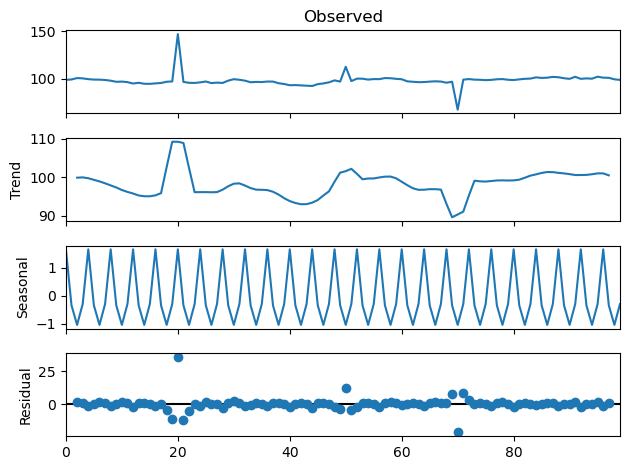

In [15]:
# 시계열 분해 
result = seasonal_decompose(data, model ='additive',period=4)
result.plot()

# 잔차를 통한 이상치 탐지
residuals = result.resid
outliers = residuals[abs(residuals) > 2 * residuals.std()]
